In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_valid, y_train = y_train_full[5000:], y_train_full[:5000]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [5]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),     
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

2025-09-09 19:38:14.227038: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-09-09 19:38:14.227061: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-09 19:38:14.227070: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-09 19:38:14.227084: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-09 19:38:14.227094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights
weights.shape

(784, 300)

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2025-09-09 19:38:14.615300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.5148 - loss: 1.4775 - val_accuracy: 0.6638 - val_loss: 1.0349
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.7022 - loss: 0.8820 - val_accuracy: 0.7202 - val_loss: 0.8372
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.7454 - loss: 0.7444 - val_accuracy: 0.7207 - val_loss: 0.7454
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7594 - loss: 0.6826 - val_accuracy: 0.7452 - val_loss: 0.7272
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.7830 - loss: 0.6357 - val_accuracy: 0.7628 - val_loss: 0.6706
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.7930 - loss: 0.6034 - val_accuracy: 0.7803 - val_loss: 0.6371
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.7990 - loss: 0.5771 - val_accuracy: 0.7578 - val_loss: 0.6581
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8108 - loss: 0.5600 - val_accuracy: 0.796

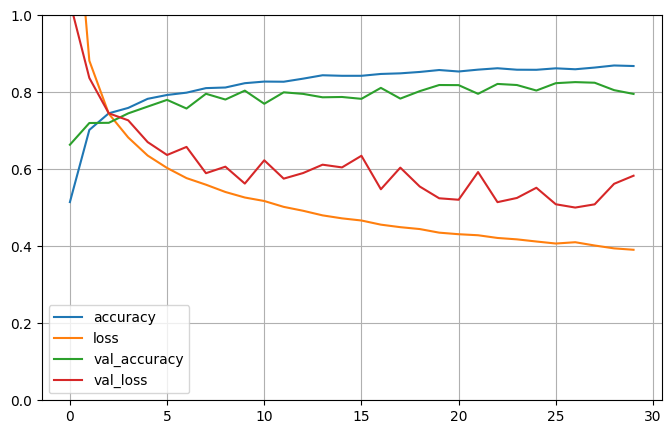

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
X_test = X_test / 255.0
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1000 - loss: 3.1928


[3.1927504539489746, 0.10000000149011612]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.05, 0.03, 0.04, 0.05, 0.01, 0.7 , 0.06, 0.03, 0.02, 0.01],
       [0.05, 0.03, 0.04, 0.05, 0.01, 0.7 , 0.06, 0.03, 0.02, 0.01],
       [0.05, 0.03, 0.04, 0.05, 0.01, 0.7 , 0.06, 0.03, 0.02, 0.01]],
      dtype=float32)